# USF PROJECT 2 GROUP 6

Durham University 

MSc Business Analytics

**Members:** Madison Tagg, Daria Komarova, Ziyue Jin, Xinyi Luo

In [1]:
import pandas as pd
import numpy as np

filename = 'Restaurant_Scores.csv'
restaurant_df = pd.read_csv(filename)
#restaurant_df

## CLEANING DATA

*The Main objective is to predict poor restaurant scores. This will look at the basic statistics of the `inspection_score` we have in our data so far.*

In [2]:
restaurant_df['inspection_score'].describe()

count    39541.000000
mean        86.221669
std          8.489218
min         45.000000
25%         81.000000
50%         87.000000
75%         92.000000
max        100.000000
Name: inspection_score, dtype: float64

**We can see that the columns with the least amount of missing data are:**
    - business_id
    - business_name
    - business_address
    - business_city
    - business_state
    - inspection_id
    - inspection_date
    - inspection_type

In [3]:
restaurant_df.isna().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1186
business_latitude            26498
business_longitude           26498
business_location            26498
business_phone_number        36301
inspection_id                    0
inspection_date                  0
inspection_score             14432
inspection_type                  0
violation_id                 13720
violation_description        13720
risk_category                13720
Neighborhoods (old)          26526
Police Districts             26526
Supervisor Districts         26526
Fire Prevention Districts    26568
Zip Codes                    26513
Analysis Neighborhoods       26526
dtype: int64

## *Removing Duplicates*

In [4]:
Remove_dups = restaurant_df.drop_duplicates(subset=None, keep='first', inplace=False)
print('duplicated rows:',(len(restaurant_df)-len(Remove_dups)))
print("percentage of duplicated rows:","%.2f%%"%(((len(restaurant_df)-len(Remove_dups))/len(restaurant_df))*100))
Remove_dups

duplicated rows: 43
percentage of duplicated rows: 0.08%


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,...,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,...,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,...,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


## *Removing Irrelavant Columns*

In [5]:
X = Remove_dups[[col for col in Remove_dups.columns if col not in 
             ['business_id',
              'business_name',
              'business_address',
              'business_city',
              'business_latitude',
              'business_longitude',
              'inspection_id',
              'business_state',
              'business_phone_number',
              'business_location',
              'inspection_date',
              'Neighborhoods (old)',
              'violation_id',
              'inspection_type',
              'Zip Codes']]]
X

,business_postal_code,inspection_score,violation_description,risk_category,Police Districts,Supervisor Districts,Fire Prevention Districts,Analysis Neighborhoods
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94118,96.0,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN
2,94110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,94111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94109,NaN,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
53968,94110,94.0,Wiping cloths not clean or properly stored or ...,Low Risk,NaN,NaN,NaN,NaN
53969,94134,75.0,Foods not protected from contamination,Moderate Risk,NaN,NaN,NaN,NaN
53970,94103,84.0,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN
53971,94110,83.0,Unclean or unsanitary food contact surfaces,High Risk,NaN,NaN,NaN,NaN


## *Adjusting mistake Values*

In [6]:
X = X.replace('941102019','94110') # Changing Postal Codes that were inputted wrong

In [7]:
X.isna().sum()

business_postal_code          1185
inspection_score             14421
violation_description        13720
risk_category                13720
Police Districts             26503
Supervisor Districts         26503
Fire Prevention Districts    26545
Analysis Neighborhoods       26503
dtype: int64

## *Dropping Rows with Missing Values*

In [8]:
Training_data = pd.DataFrame.dropna(X)
Training_data

,business_postal_code,inspection_score,violation_description,risk_category,Police Districts,Supervisor Districts,Fire Prevention Districts,Analysis Neighborhoods
11,94107,71.0,Improper storage use or identification of toxi...,Low Risk,2.0,9.0,6.0,34.0
16,94102,84.0,Moderate risk food holding temperature,Moderate Risk,9.0,9.0,7.0,36.0
64,94133,92.0,Inadequate and inaccessible handwashing facili...,Moderate Risk,1.0,10.0,3.0,23.0
73,94103,92.0,Moderate risk food holding temperature,Moderate Risk,2.0,9.0,12.0,34.0
92,94111,74.0,Foods not protected from contamination,Moderate Risk,1.0,10.0,3.0,8.0
...,...,...,...,...,...,...,...,...
53882,94110,80.0,Moderate risk vermin infestation,Moderate Risk,4.0,7.0,2.0,20.0
53883,94127,90.0,Inadequate and inaccessible handwashing facili...,Moderate Risk,7.0,4.0,9.0,41.0
53885,94109,79.0,Unclean or unsanitary food contact surfaces,High Risk,10.0,9.0,7.0,36.0
53887,94109,96.0,Inadequate and inaccessible handwashing facili...,Moderate Risk,10.0,9.0,7.0,36.0


# Visualisation of attributes


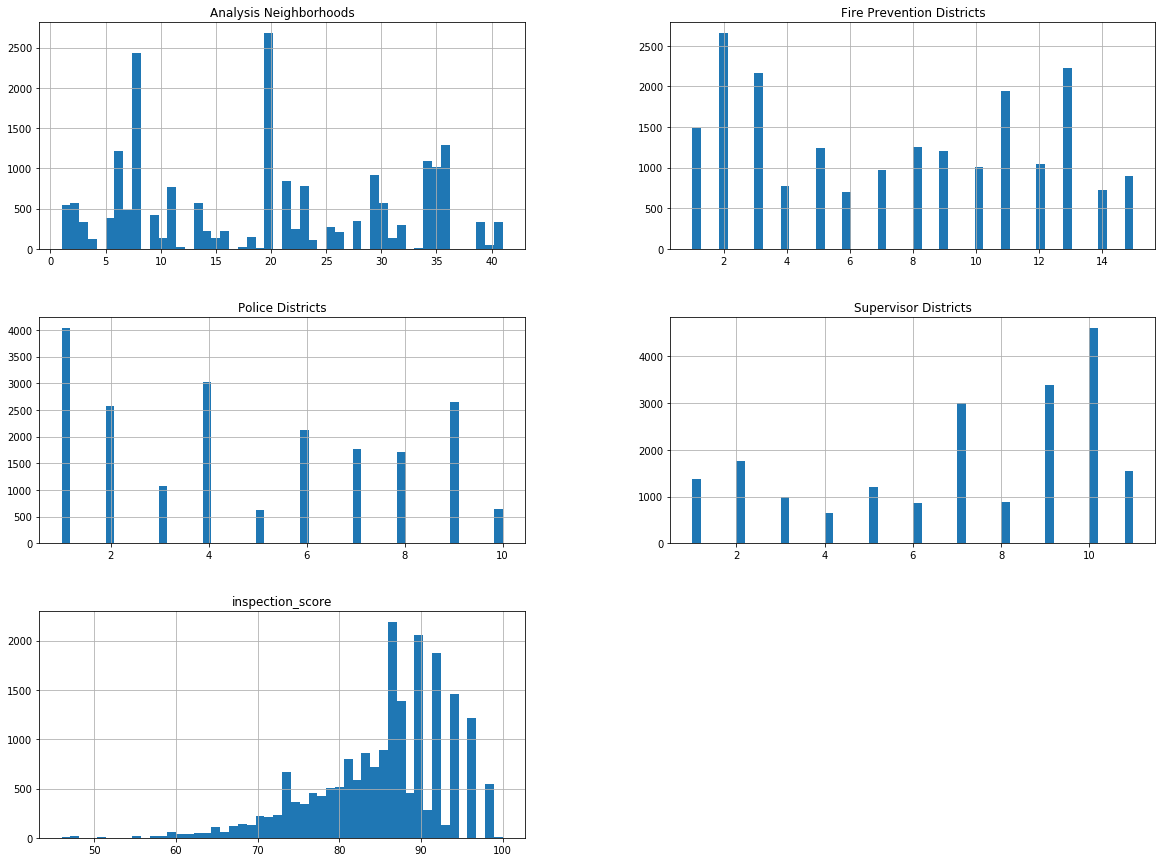

In [9]:
import matplotlib.pyplot as plt
Training_data.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
correlation = Training_data.corr()
correlation

,inspection_score,Police Districts,Supervisor Districts,Fire Prevention Districts,Analysis Neighborhoods
inspection_score,1.000000,-0.004618,0.044815,-0.017155,0.020038
Police Districts,-0.004618,1.000000,-0.438645,0.259330,0.326251
Supervisor Districts,0.044815,-0.438645,1.000000,-0.093678,-0.215288
Fire Prevention Districts,-0.017155,0.259330,-0.093678,1.000000,0.087402
Analysis Neighborhoods,0.020038,0.326251,-0.215288,0.087402,1.000000


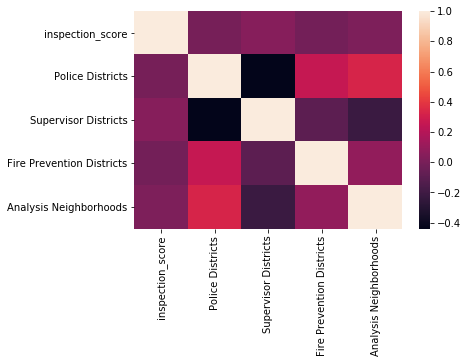

In [11]:
import seaborn as sns
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

## *Looking at the distribution of Inspection Scores*

(20272, 8)


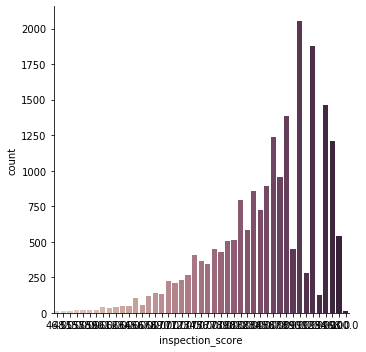

In [12]:
print(Training_data.shape)
import seaborn as sns
sns.catplot(x="inspection_score", kind="count", palette="ch:.18", data=Training_data)

<div class="alert alert-block alert-success">
    <h2>
        Linear Regression using <kbd>Statsmodels</kbd>
    </h2>
</div>

## *Adding Constant*

In [13]:
import statsmodels.api as sm 
X = sm.add_constant(Training_data)
#X.loc[X['business_postal_code'] == 'CA'] #showing the rows where postal code 'CA' not numeric

## *Converting `risk_category` to numeric values*

In [14]:
try:
    X = pd.concat((X, pd.get_dummies(X['risk_category'], drop_first = False)), axis = 1)
    X.drop(['risk_category'], axis = 1, inplace = True)
except:
    print('Error')

## *Converting `violation_description` to numeric values*

In [15]:
try:
    X = pd.concat((X, pd.get_dummies(X['violation_description'], drop_first = False)), axis = 1)
    X.drop(['violation_description'], axis = 1, inplace = True)
except:
    print('Error')

## *Converting `Police Districts` `Supervisor Districts` `Fire Prevention Districts` `Analysis Neighborhoods` to numeric values*

In [16]:
try:
    X = pd.concat((X, pd.get_dummies(X['Police Districts'], drop_first = False)), axis = 1)
    X.drop(['Police Districts'], axis = 1, inplace = True)
except:
    print('Error1')

try:
    X = pd.concat((X, pd.get_dummies(X['Supervisor Districts'], drop_first = False)), axis = 1)
    X.drop(['Supervisor Districts'], axis = 1, inplace = True)
except:
    print('Error2')

try:
    X = pd.concat((X, pd.get_dummies(X['Fire Prevention Districts'], drop_first = False)), axis = 1)
    X.drop(['Fire Prevention Districts'], axis = 1, inplace = True)
except:
    print('Error3')

try:
    X = pd.concat((X, pd.get_dummies(X['Analysis Neighborhoods'], drop_first = False)), axis = 1)
    X.drop(['Analysis Neighborhoods'], axis = 1, inplace = True)
except:
    print('Error4')

## *Converting `postal_codes` to numeric values*

In [17]:
try:
    X = pd.concat((X, pd.get_dummies(X['business_postal_code'], drop_first = False)), axis = 1)
    X.drop(['business_postal_code'], axis = 1, inplace = True)
except:
    print('Error')

### *Creating X and Y that is ready for linear regression*

In [18]:
y = X.loc[:, 'inspection_score'] # when selection rows by name, not by integery
X = X.drop(['inspection_score'], axis=1)

In [19]:
sm_lr_model_01 = sm.OLS(y, X.astype(float))
results = sm_lr_model_01.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       inspection_score   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     27.91
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:38:07   Log-Likelihood:                -69101.
No. Observations:               20272   AIC:                         1.385e+05
Df Residuals:                   20107   BIC:                         1.398e+05
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/Users/madisontagg/opt/anaconda3/envs/USF/lib/python3.6/site-packages/statsmodels/sandbox/regression/predstd.py:97: RuntimeWarning: invalid value encountered in sqrt
  predstd = np.sqrt(predvar)


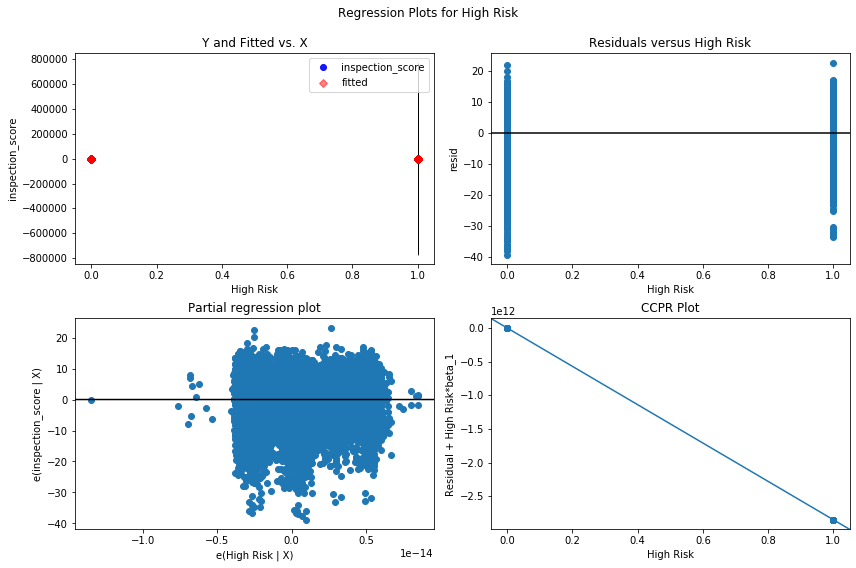

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "High Risk", fig=fig)

<div class="alert alert-block alert-success">
    <h2>
        Linear Regression in <kbd>scikit-learn</kbd>
    </h2>
</div>

In [21]:
from sklearn.linear_model import LinearRegression
myLinearRegression_01 = LinearRegression()

SKL_X = X

# drop constant column
SKL_X.drop(['const'], axis = 1, inplace = True)

In [22]:
myLinearRegression_01.fit(SKL_X, y)
print('Intercept: ', myLinearRegression_01.intercept_)
print('Coefficients: ', myLinearRegression_01.coef_)

Intercept:  82704459638228.4
Coefficients:  [-8.31267628e+13 -8.50788085e+13 -9.35406996e+13  1.63604882e+13
  5.94655134e+12  1.63604882e+13  1.63604882e+13  1.63604882e+13
  7.89859703e+12  1.63604882e+13  5.94655134e+12  5.94655134e+12
  5.94655134e+12  5.94655134e+12  7.89859703e+12  7.89859703e+12
  7.89859703e+12  5.94655134e+12  7.89859703e+12  7.89859703e+12
  1.63604882e+13  7.89859703e+12  7.89859703e+12  1.63604882e+13
  7.89859703e+12  1.63604882e+13  7.89859703e+12  1.63604882e+13
  1.63604882e+13  7.89859703e+12  7.89859703e+12  1.63604882e+13
  1.63604882e+13  7.89859703e+12  5.94655134e+12  1.63604882e+13
  1.63604882e+13  1.63604882e+13  5.94655134e+12  7.89859703e+12
  7.89859703e+12  7.89859703e+12  7.89859703e+12  1.63604882e+13
  1.63604882e+13  1.63604882e+13  5.94655134e+12  7.89859703e+12
  1.63604882e+13  7.89859703e+12  1.63604882e+13  5.94655134e+12
  7.89859703e+12  5.94655134e+12  7.89859703e+12  5.94655134e+12
  5.94655134e+12  7.89859703e+12  7.89859703e+

### Generating $R^2$:

In [23]:
from sklearn.metrics import r2_score
predictedValues = myLinearRegression_01.predict(SKL_X)
SKL_r2 = r2_score(y, predictedValues)
print('Linear Regression R-squared: ', SKL_r2)

Linear Regression R-squared:  0.1875930760732032


### Generating mean square error (MSE):

In [24]:
from sklearn.metrics import mean_squared_error
SKL_MSE = mean_squared_error(y, predictedValues)
print('Linear Regression MSE: ', SKL_MSE)

Linear Regression MSE:  53.347798565004226


<div class="alert alert-block alert-success">
    <h2>
        Ridge Regression in <kbd>scikit-learn</kbd>
    </h2>
</div>

re-running linear regression mode to establish a MSE baseline.

In [25]:
myLinearRegression_01 = LinearRegression()
myLinearRegression_01.fit(SKL_X, y)
predictedValues = myLinearRegression_01.predict(SKL_X)
print("MSE Baseline: ", round(mean_squared_error(y, predictedValues), 2))

MSE Baseline:  53.35


Confirming that if $\alpha$ = 0, Ridge regression should produce the same MSE as a linear Regression

In [26]:
from sklearn.linear_model import Ridge

myRidgeRegression_01 = Ridge(normalize = True)

myRidgeRegression_01.set_params(alpha = 0)
myRidgeRegression_01.fit(SKL_X, y)
ridgePredictedValues = myRidgeRegression_01.predict(X)
print("MSE: ", round(mean_squared_error(y, ridgePredictedValues), 2))

MSE:  53.38


In [27]:
# Create a vector of alphas
alphas = np.linspace(1e-5, 50, 1000)
alphas[0:10], alphas[-10:] #see first 10 and last 10 alphas

(array([1.0000000e-05, 5.0060040e-02, 1.0011008e-01, 1.5016012e-01,
        2.0021016e-01, 2.5026020e-01, 3.0031024e-01, 3.5036028e-01,
        4.0041032e-01, 4.5046036e-01]),
 array([49.54954964, 49.59959968, 49.64964972, 49.69969976, 49.7497498 ,
        49.79979984, 49.84984988, 49.89989992, 49.94994996, 50.        ]))

### Performing a grid-serch of various $\alpha$ values to see the impact of $\beta_k$ coefficient values

In [28]:
myRidgeRegression_02 = Ridge(normalize = True) # recall the importance of normalization
coefs = []

for a in alphas:
    myRidgeRegression_02.set_params(alpha = a)
    myRidgeRegression_02.fit(X.iloc[:, 3:7], y)    # X.iloc[:, 3:7] only selects betas 3, 4, 5, and 6

    for i in range(X.iloc[:, 3:7].shape[1]):       # X.iloc[:, 3:7] only selects betas 3, 4, 5, and 6
        coefs.append([a, "b_" + str(i + 1), myRidgeRegression_02.coef_[i]]) # keep track of the alpha, beta and beta coefficient values in a list 

In [29]:
import altair as alt
# create a dataframe from the coefs list, because altair likes dataframes
myDF = pd.DataFrame(coefs, columns=['alpha', 'beta', 'coef'])

#Using Altair to visualize
alt.Chart(myDF).mark_line().encode(
    x = alt.X('alpha', title = 'Alpha Values'),
    y = alt.Y('coef', title='Beta Coefficient Values'),
    color = alt.Color('beta', legend=alt.Legend(title="Beta_k's")))

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### My jupyter notebook is not updated so we can't see the visualization. The graph should show the behavior that the regularization parameter $\alpha$ has on the $\beta$'s

Now we are going to recalibrate `alpha` values that better fit the optmal `alpha` selection.

In [30]:
alphas = np.linspace(0.01, 1, 1000)

To use `RidgeCV`, we must use cross-validation (CV).

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(SKL_X, y, test_size = 0.75, random_state = 11)

Now we are going to feed the vector of `alphas` into `RidgeCV` which will return the `alpha` that will eventually generate the lowest *MSE*

In [32]:
from sklearn.linear_model import RidgeCV

myRidgeRegression_03 = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True, store_cv_values=True)
myRidgeRegression_03.fit(X_train, y_train) 
print('Minimum Alpha Tested: ', min(alphas))
print('Best Alpha is: ', myRidgeRegression_03.alpha_)
print('Maximum Alpha Tested: ', max(alphas))

Minimum Alpha Tested:  0.01
Best Alpha is:  0.14675675675675678
Maximum Alpha Tested:  1.0


### Using this, we can now compute the lowest MSE with the best `alpha` value

In [33]:
bestRidge = Ridge(alpha = myRidgeRegression_03.alpha_, normalize = True)
bestRidge.fit(X_test, y_test)   
bestRidgePredictedValues = bestRidge.predict(X_test) 
print('Lowest Ridge MSE: ', round(mean_squared_error(y_test, bestRidgePredictedValues), 2)) 

Lowest Ridge MSE:  53.67


In [34]:
R_R2 = bestRidge.score(SKL_X,y)
print('Ridge Regression R Squared: ', R_R2)

Ridge Regression R Squared:  0.17828388617436974


<div class="alert alert-block alert-success">
    <h2>
        Least Absolute Shrinkage and Selection Operator (LASSO) Regression in <kbd>scikit-learn</kbd>
    </h2>
</div>

__Ridge__ pushes variables close to zero as `alpha` increases.

__LASSO__ pushes many of them directly to zero as `alpha` increases. 

This differentiating behaviour is a function of the *penalty term*.

In [35]:
from sklearn.linear_model import Lasso, LassoCV

myLasso = Lasso(normalize = True, alpha = 0.1)
myLasso.fit(SKL_X, y)
print('Number of Non-Zero Terms: ', np.sum(myLasso.coef_ != 0))

Number of Non-Zero Terms:  0


In [36]:
lasso = Lasso(normalize = True, max_iter = 5000)
zeroBetaCount = []

for a in alphas:
    lasso = Lasso(normalize = True, alpha = a)
    lasso.fit(SKL_X, y)
    zeroBetaCount.append([a, np.sum(lasso.coef_ != 0)]) 

In [37]:
myZero = pd.DataFrame(zeroBetaCount, columns=['alpha', 'nonZero_Betas'])

In [38]:
alt.Chart(myZero).mark_line().encode(
    x = alt.X('alpha', title = 'Alpha Values'),
    y = alt.Y('nonZero_Betas', title='# Non-Zero Beta Coefficient'),
    )

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Now, Visualizing the impact that increasing $\alpha$ has on $\hat{\beta_k}$ values

In [39]:
lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X.iloc[:, 3:7], y) # X.iloc[:, 3:7] only selects betas 3, 4, 5, and 6

    for i in range(SKL_X.iloc[:, 3:7].shape[1]):
        coefs.append([a, "b_" + str(i + 1), lasso.coef_[i]]) # keep track of the alpha, beta and beta coefficient values in a list 

In [40]:
myCoefs = pd.DataFrame(coefs, columns=['alpha', 'beta', 'beta_val'])

In [41]:
myDF = pd.DataFrame(myCoefs)

In [42]:
alt.Chart(myDF).mark_line().encode(
    x = alt.X('alpha', title = 'Alpha Values'),
    y = alt.Y('beta_val', title='Beta Coefficient Values'),
    color = alt.Color('beta', legend=alt.Legend(title="Beta_k's")))

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### The code below will generate the best $\alpha$ and the best LASSO `MSE`

In [43]:
myLasso = LassoCV(normalize = True)
coefs = []

myLASSORegression = LassoCV(alphas = alphas, normalize = True)
myLASSORegression.fit(X_train, y_train) 
print('Minimum Alpha Tested: ', min(alphas))
print('Best Alpha is: ', myLASSORegression.alpha_)
print('Maximum Alpha Tested: ', max(alphas))

Minimum Alpha Tested:  0.01
Best Alpha is:  0.01
Maximum Alpha Tested:  1.0


In [44]:
finalLASSO = Lasso(normalize = True, alpha = myLASSORegression.alpha_)
finalLASSO.fit(X_train, y_train) 
bestLASSOPredictedValues = finalLASSO.predict(X_test) 

print('Best LASSO MSE: ', round(mean_squared_error(y_test, bestLASSOPredictedValues), 2)) 

print('Number of Non-Zero Coefficients: ', np.sum(finalLASSO.coef_ !=0))

Best LASSO MSE:  60.89
Number of Non-Zero Coefficients:  5


In [45]:
LR_R2 = finalLASSO.score(SKL_X,y)
print('Lasso Regression R-Squared: ', LR_R2)

Lasso Regression R-Squared:  0.07368100294785007


# RESULTS:

<div class="alert alert-block alert-success">
    <h4>
        Regression Summary Output
    </h4>
    
<ul>
  <li><h4> Linear Regression: MSE = 53.34, Variables = 170 (all) </h4></li>
    
  <li><h4>Ridge Regression: MSE = 53.67, Variables = 170 (all) with the regularization parameter $\alpha$ = 0.14 </h4></li>
    
  <li><h4>LASSO Regression: MSE = 60.89, Variables = 5 with the regularization parameter $\alpha$ = 0.01 </h4></li>
</ul>
    
    
</div>

## A comparison between Predicted and Actual in the Linear Regression

In [47]:
Linear_df = pd.DataFrame({'Actual': y, 'Predicted': predictedValues})

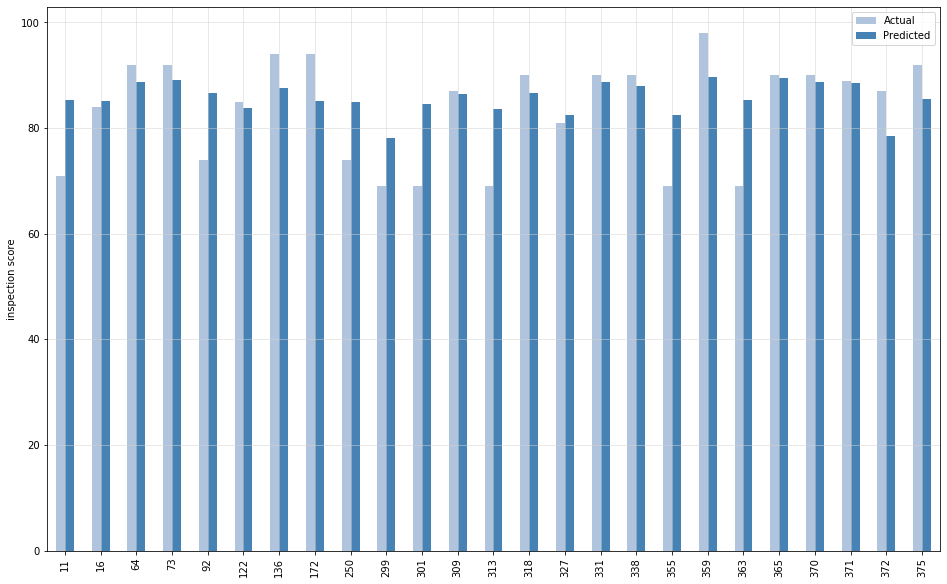

In [48]:
df1 = Linear_df.head(25)
df1 = df1.plot(kind='bar',figsize=(16,10), color = ('lightsteelblue','steelblue'))
df1.set_ylabel("inspection score")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.show()